In [135]:
import pandas as pd

In [137]:
df = pd.read_csv('dog/Dog Breads Around The World.csv')

In [143]:
df = df.rename(columns={"Name": "이름",
    "Origin": "원산지",
    "Type": "유형",
    "Unique Feature": "특징",
    "Friendly Rating (1-10)": "친화도 (1-10)",
    "Life Span": "수명 (년)",
    "Size": "크기",
    "Grooming Needs": "손질 필요도",
    "Exercise Requirements (hrs/day)": "운동 필요량 (시간/일)",
    "Good with Children": "어린이 친화적 여부",
    "Intelligence Rating (1-10)": "지능 (1-10)",
    "Shedding Level": "털 빠짐 정도",
    "Health Issues Risk": "건강 문제 위험",
    "Average Weight (kg)": "평균 체중 (kg)",
    "Training Difficulty (1-10)": "훈련 난이도 (1-10)"
})

In [321]:
df.loc[df['품종'] == '랫 테리어']

,품종,원산지,유형,특징,친화도 (1-10),수명 (년),크기,손질 필요도,운동 필요량 (시간/일),어린이 친화적 여부,지능 (1-10),털 빠짐 정도,건강 문제 위험,평균 체중 (kg),훈련 난이도 (1-10),크기_수치화
120,랫 테리어,미국,테리어,운동적인 민첩한,7,15,"[소형, 중형]",Low,2.0,Yes,7,Moderate,Moderate,5,7,1.5


In [ ]:
df['이름'] = df['이름'].replace({
    'Affenpinscher': '아펜핀셔',
    'Afghan Hound': '아프간 하운드',
    'Airedale Terrier': '에어데일 테리어',
    'Akita': '아키타',
    'Alaskan Malamute': '알래스칸 말라뮤트',
    'American Bulldog': '아메리칸 불독',
    'American Eskimo': '아메리칸 에스키모',
    'American Foxhound': '아메리칸 폭스하운드',
    'Australian Cattle Dog': '오스트레일리안 캐틀 독',
    'Australian Shepherd': '오스트레일리안 셰퍼드',
    'Australian Terrier': '오스트레일리안 테리어',
    'Basenji': '바센지',
    'Basset Hound': '바셋 하운드',
    'Beagle': '비글',
    'Bearded Collie': '보더드 콜리',
    'Bernese Mountain Dog': '버니즈 마운틴 독',
    'Bichon Frise': '비숑 프리제',
    'Black Russian Terrier': '블랙 러시안 테리어',
    'Bloodhound': '블러드하운드',
    'Border Collie': '보더 콜리',
    'Border Terrier': '보더 테리어',
    'Borzoi': '보르조이',
    'Boston Terrier': '보스턴 테리어',
    'Bouvier des Flandres': '부비에 데 플랑드르',
    'Boxer': '복서',
    'Briard': '브리아르',
    'Brittany': '브리타니',
    'Brussels Griffon': '브뤼셀 그리폰',
    'Bull Terrier': '불 테리어',
    'Bullmastiff': '불마스티프',
    'Cairn Terrier': '케언 테리어',
    'Canaan Dog': '카나안 독',
    'Cane Corso': '카네 코르소',
    'Cardigan Welsh Corgi': '카디건 웰시 코기',
    'Cavalier King Charles Spaniel': '카발리에 킹 찰스 스패니얼',
    'Chesapeake Bay Retriever': '체서피크 베이 리트리버',
    'Chihuahua': '치와와',
    'Chinese Crested': '차이니즈 크레스티드',
    'Chinese Shar-Pei': '차이니즈 샤페이',
    'Chow Chow': '차우 차우',
    'Clumber Spaniel': '클럼버 스패니얼',
    'Cocker Spaniel': '코커 스패니얼',
    'Collie': '콜리',
    'Curly-Coated Retriever': '컬리 코티드 리트리버',
    'Dachshund': '닥스훈트',
    'Dalmatian': '달마시안',
    'Dandie Dinmont Terrier': '댄디 딘몬트 테리어',
    'Doberman Pinscher': '도베르만 핀셔',
    'English Bulldog': '잉글리시 불독',
    'English Cocker Spaniel': '잉글리시 코커 스패니얼',
    'English Foxhound': '잉글리시 폭스하운드',
    'English Setter': '잉글리시 세터',
    'English Springer Spaniel': '잉글리시 스프링어 스패니얼',
    'English Toy Spaniel': '잉글리시 토이 스패니얼',
    'Entlebucher Mountain Dog': '엔틀부처 마운틴 독',
    'Field Spaniel': '필드 스패니얼',
    'Finnish Lapphund': '피니시 랩훈트',
    'Finnish Spitz': '피니시 스피츠',
    'Flat-Coated Retriever': '플랫 코티드 리트리버',
    'French Bulldog': '프렌치 불독',
    'German Pinscher': '저먼 핀셔',
    'German Shepherd': '저먼 셰퍼드',
    'German Shorthaired Pointer': '저먼 쇼트헤어드 포인터',
    'German Wirehaired Pointer': '저먼 와이어헤어드 포인팅 그리폰',
    'Giant Schnauzer': '자이언트 슈나우저',
    'Golden Retriever': '골든 리트리버',
    'Gordon Setter': '고든 세터',
    'Great Dane': '그레이트 데인',
    'Great Pyrenees': '그레이트 피레니즈',
    'Greater Swiss Mountain Dog': '그레이터 스위스 마운틴 독',
    'Greyhound': '그레이하운드',
    'Harrier': '해리어',
    'Havanese': '하바네세',
    'Ibizan Hound': '아이비전 하운드',
    'Icelandic Sheepdog': '아이슬란딕 쉽독',
    'Irish Red and White Setter': '아이리시 레드 앤 화이트 세터',
    'Irish Setter': '아이리시 세터',
    'Irish Terrier': '아이리시 테리어',
    'Irish Water Spaniel': '아이리시 워터 스패니얼',
    'Irish Wolfhound': '아이리시 울프하운드',
    'Italian Greyhound': '이탈리안 그레이하운드',
    'Japanese Chin': '재패니즈 친',
    'Japanese Spitz': '재패니즈 스피츠',
    'Keeshond': '키스혼트',
    'Kerry Blue Terrier': '케리 블루 테리어',
    'Komondor': '코몬도르',
    'Kuvasz': '쿠바츠',
    'Labrador Retriever': '래브라도 리트리버',
    'Lakeland Terrier': '레이크랜드 테리어',
    'Leonberger': '레온베르거',
    'Lhasa Apso': '라사 압소',
    'Lowchen': '뢰첸',
    'Maltese': '말티즈',
    'Manchester Terrier': '맨체스터 테리어',
    'Mastiff': '마스티프',
    'Miniature Pinscher': '미니어처 핀셔',
    'Miniature Schnauzer': '미니어처 슈나우저',
    'Neapolitan Mastiff': '네아폴리탄 마스티프',
    'Newfoundland': '뉴펀들랜드',
    'Norfolk Terrier': '노퍽 테리어',
    'Norwegian Buhund': '노르웨지안 부훈트',
    'Norwegian Elkhound': '노르웨지안 엘크하운드',
    'Norwegian Lundehund': '노르웨지안 룬데훈트',
    'Old English Sheepdog': '올드 잉글리시 쉽독',
    'Otterhound': '오터하운드',
    'Papillon': '파피용',
    'Pekingese': '페키니즈',
    'Pembroke Welsh Corgi': '펨브로크 웰시 코기',
    'Petit Basset Griffon Vendeen': '쁘띠 바셋 그리폰 방데',
    'Pharaoh Hound': '파라오 하운드',
    'Pointer': '포인터',
    'Pomeranian': '포메라니안',
    'Poodle (Miniature)': '푸들 (미니어처)',
    'Poodle (Standard)': '푸들 (스탠다드)',
    'Poodle (Toy)': '푸들 (토이)',
    'Portuguese Podengo': '포르투갈 포덴고',
    'Portuguese Water Dog': '포르투갈 워터 독',
    'Pudelpointer': '푸델포인터',
    'Pug': '퍼그',
    'Pyrenean Mountain Dog': '피레니언 마운틴 독',
    'Rat Terrier': '랫 테리어',
    'Redbone Coonhound': '레드본 쿤하운드',
    'Rhodesian Ridgeback': '로디지안 릿지백',
    'Rottweiler': '로트와일러',
    'Saint Bernard': '세인트 버나드',
    'Saluki': '살루키',
    'Samoyed': '사모예드',
    'Schipperke': '스키퍼키',
    'Scottish Deerhound': '스코티시 디어하운드',
    'Scottish Terrier': '스코티시 테리어',
    'Shetland Sheepdog': '셰틀랜드 쉽독',
    'Shiba Inu': '시바견',
    'Shih Tzu': '시추',
    'Siberian Husky': '시베리안 허스키',
    'Silky Terrier': '실키 테리어',
    'Skye Terrier': '스카이 테리어',
    'Sloughi': '슬루기',
    'Smooth Fox Terrier': '스무스 폭스 테리어',
    'Soft-Coated Wheaten Terrier': '소프트 코티드 휘튼 테리어',
    'Spanish Water Dog': '스패니시 워터 독',
    'Spinone Italiano': '스피노네 이탈리아노',
    'Staffordshire Bull Terrier': '스태퍼드셔 불 테리어',
    'Standard Poodle': '스탠다드 푸들',
    'Standard Schnauzer': '스탠다드 슈나우저',
    'Sussex Spaniel': '서섹스 스패니얼',
    'Swedish Vallhund': '스웨디시 발훈트',
    'Thai Ridgeback': '타이 릿지백',
    'Tibetan Mastiff': '티베탄 마스티프',
    'Toy Fox Terrier': '토이 폭스 테리어',
    'Treeing Walker Coonhound': '트리잉 워커 쿤하운드',
    'Welsh Springer Spaniel': '웰시 스프링어 스패니얼',
    'Welsh Terrier': '웰시 테리어',
    'West Highland White Terrier': '웨스트 하이랜드 화이트 테리어',
    'Whippet': '휘핏',
    'Wire Fox Terrier': '와이어 폭스 테리어',
    'Wirehaired Dachshund': '와이어헤어드 닥스훈트',
    'Wirehaired Pointing Griffon': '와이어헤어드 포인팅 그리폰',
    'Xoloitzcuintli': '솔로이츠퀸틀',
    'Yorkshire Terrier': '요크셔 테리어'
})

In [ ]:
df

,이름,원산지,유형,특징,친화도 (1-10),수명 (년),크기,손질 필요도,운동 필요량 (시간/일),어린이 친화적 여부,지능 (1-10),털 빠짐 정도,건강 문제 위험,평균 체중 (kg),훈련 난이도 (1-10)
0,아펜핀셔,Germany,Toy,Monkey-like face,7,14,Small,High,1.5,Yes,8,Moderate,Low,4,6
1,아프간 하운드,Afghanistan,Hound,Long silky coat,5,13,Large,Very High,2.0,No,4,High,Moderate,25,8
2,에어데일 테리어,England,Terrier,Largest of terriers,8,12,Medium,High,2.0,Yes,7,Moderate,Low,21,6
3,아키타,Japan,Working,Strong loyalty,6,11,Large,Moderate,2.0,With Training,7,High,High,45,9
4,알래스칸 말라뮤트,Alaska USA,Working,Strong pulling ability,7,11,Large,High,3.0,Yes,6,Very High,Moderate,36,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,와이어 폭스 테리어,England,Terrier,Energetic,7,14,Small,Moderate,2.0,Yes,7,Moderate,Moderate,8,7
155,와이어헤어드 닥스훈트,Germany,Hound,Wiry coat,7,13,Small,Moderate,1.5,With Training,7,Moderate,High,8,7
156,와이어헤어드 포인팅 그리폰,Netherlands,Sporting,Shaggy beard,7,13,Medium,High,2.0,Yes,7,Moderate,Moderate,20,6
157,솔로이츠퀸틀,Mexico,Non-Sporting,Hairless variety,7,15,Small-Large,Low,2.0,With Training,8,Low,Moderate,25-Jul,6


In [148]:
df['원산지'] = df['원산지'].replace({
    'Germany': '독일',
    'Afghanistan': '아프가니스탄',
    'England': '영국',
    'Japan': '일본',
    'Alaska USA': '알래스카 USA',
    'USA': '미국',
    'Australia': '호주',
    'Central Africa': '중앙 아프리카',
    'France': '프랑스',
    'Scotland': '스코틀랜드',
    'Switzerland': '스위스',
    'Mediterranean': '지중해',
    'Russia': '러시아',
    'Belgium': '벨기에',
    'UK': '영국',
    'Israel': '이스라엘',
    'Italy': '이탈리아',
    'Wales': '웨일스',
    'Mexico': '멕시코',
    'China': '중국',
    'Croatia': '크로아티아',
    'Finland': '핀란드',
    'Egypt': '이집트',
    'Cuba': '쿠바',
    'Spain': '스페인',
    'Iceland': '아이슬란드',
    'Ireland': '아일랜드',
    'Tibet': '티베트',
    'Hungary': '헝가리',
    'Canada': '캐나다',
    'Malta': '몰타',
    'North Africa': '북아프리카',
    'Thailand': '태국',
    'Middle East': '중동',
    'Siberia': '시베리아',
    'Netherlands': '네덜란드',
    'Portugal': '포르투갈',
    'Africa': '아프리카',
    'Sweden': '스웨덴'
})

In [151]:
df.rename(columns={'이름':'품종'}, inplace=True)

In [155]:
df.head()

,품종,원산지,유형,특징,친화도 (1-10),수명 (년),크기,손질 필요도,운동 필요량 (시간/일),어린이 친화적 여부,지능 (1-10),털 빠짐 정도,건강 문제 위험,평균 체중 (kg),훈련 난이도 (1-10)
0,아펜핀셔,독일,Toy,Monkey-like face,7,14,Small,High,1.5,Yes,8,Moderate,Low,4,6
1,아프간 하운드,아프가니스탄,Hound,Long silky coat,5,13,Large,Very High,2.0,No,4,High,Moderate,25,8
2,에어데일 테리어,영국,Terrier,Largest of terriers,8,12,Medium,High,2.0,Yes,7,Moderate,Low,21,6
3,아키타,일본,Working,Strong loyalty,6,11,Large,Moderate,2.0,With Training,7,High,High,45,9
4,알래스칸 말라뮤트,알래스카 USA,Working,Strong pulling ability,7,11,Large,High,3.0,Yes,6,Very High,Moderate,36,8


In [160]:
df['유형'] = df['유형'].replace({'Toy': '토이',
    'Hound': '하운드',
    'Terrier': '테리어',
    'Working': '워킹',
    'Non-Sporting': '논-스포팅',
    'Herding': '허딩',
    'Sporting': '스포팅',
    'Standard': '스탠다드'})

In [163]:
df['특징'] = df['특징'].replace({'Monkey-like face': '원숭이 같은 얼굴',
    'Long silky coat': '길고 비단결 같은 털',
    'Largest of terriers': '테리어 중 가장 큼',
    'Strong loyalty': '강한 충성심',
    'Strong pulling ability': '강한 견인 능력',
    'Muscular build': '근육질 체격',
    'Pure white coat': '순백색 털',
    'Musical voice': '아름다운 울음소리',
    'Unique blue or red coat': '독특한 파란색 또는 붉은색 털',
    'Merle coloring': '멀 색상',
    'Small but tough': '작지만 강인함',
    "Doesn't bark": '짖지 않음',
    'Short legs long body': '짧은 다리 긴 몸통',
    'Excellent sense of smell': '뛰어난 후각',
    'Long shaggy coat': '긴 덮수룩한 털',
    'Tri-colored coat': '삼색 털',
    'Cotton-like coat': '솜털 같은 털',
    'Black protective coat': '검은 보호 털',
    'Superior tracking ability': '뛰어난 추적 능력',
    'Highest intelligence': '가장 높은 지능',
    'Otter-like head': '수달 같은 머리',
    'Graceful build': '우아한 체격',
    'Tuxedo-like markings': '턱시도 같은 마킹',
    'Beard and mustache': '턱수염과 콧수염',
    'Wrinkled forehead': '주름진 이마',
    'Long protective coat': '긴 보호 털',
    'Bright orange coloring': '밝은 오렌지색',
    'Human-like expression': '인간 같은 표정',
    'Egg-shaped head': '계란 모양의 머리',
    'Powerful guardian': '강력한 보호자',
    'Weather-resistant coat': '날씨에 강한 털',
    'Desert-adapted': '사막 적응',
    'Ancient Roman guardian': '고대 로마의 보호견',
    'Long tail unlike Pembroke': '펨브로크와 달리 긴 꼬리',
    'Ruby colored coat': '루비 색 털',
    'Waterproof coat': '방수 털',
    'Smallest dog breed': '가장 작은 강아지 품종',
    'Hairless variety': '털 없는 품종',
    'Wrinkled skin': '주름진 피부',
    'Blue-black tongue': '푸른 검은색 혀',
    'Massive head': '거대한 머리',
    'Long ears': '긴 귀',
    'Lassie fame': '래시로 유명',
    'Curly water-resistant coat': '곱슬 방수 털',
    'Spotted coat': '점박이 털',
    'Distinctive topknot': '독특한 탑노트',
    'Sleek appearance': '매끄러운 외모',
    'Pushed-in nose': '눌린 코',
    'Merry temperament': '쾌활한 성격',
    'Pack hunting ability': '무리 사냥 능력',
    'Speckled coat': '얼룩덜룩한 털',
    'Dual-purpose hunter': '다목적 사냥꾼',
    'Domed head': '돔형 머리',
    'Tri-colored markings': '삼색 마킹',
    'Noble appearance': '고귀한 외모',
    'Thick double coat': '두꺼운 이중 털',
    'Fox-like appearance': '여우 같은 외모',
    'Shiny black coat': '반짝이는 검은 털',
    'Bat ears': '박쥐 귀',
    'Elegant appearance': '우아한 외모',
    'Police dog fame': '경찰견으로 유명',
    'Versatile hunter': '다재다능한 사냥꾼',
    'Weather resistant coat': '내후성 털',
    'Beard and eyebrows': '수염과 눈썹',
    'Golden coat': '황금색 털',
    'Black and tan coat': '검은색과 황갈색 털',
    'Giant size': '거대한 크기',
    'White guardian': '하얀 보호자',
    'Fastest dog breed': '가장 빠른 견종',
    'Silky coat': '실크 같은 털',
    'Large ears': '큰 귀',
    'Spitz-type tail': '스피츠형 꼬리',
    'Red and white coat': '붉은색과 흰색 털',
    'Rich red coat': '풍부한 붉은 털',
    'Fiery red coat': '불 같은 붉은 털',
    'Curly coat': '곱슬 털',
    'Tallest dog breed': '가장 키가 큰 견종',
    'Miniature sight hound': '미니어처 시각 하운드',
    'Eastern expression': '동양적인 표정',
    'Snow-white coat': '눈처럼 하얀 털',
    'Spectacles marking': '안경 마킹',
    'Blue coat': '푸른 털',
    'Corded coat': '코드 털',
    'Water-resistant coat': '방수 털',
    'Square build': '사각형 체형',
    'Lion-like mane': '사자 갈기 같은 갈기털',
    'Floor-length coat': '바닥 길이의 털',
    'Lion cut': '사자 컷',
    'Sleek and athletic': '매끄럽고 운동적인',
    'Massive size': '거대한 크기',
    'Fearless nature': '두려움 없는 성격',
    'Small but sturdy': '작지만 튼튼한',
    'Wrinkly loose skin': '주름진 느슨한 피부',
    'Water rescue ability': '물 구조 능력',
    'Bat-like ears': '박쥐 같은 귀',
    'Spitz-type appearance': '스피츠형 외모',
    'Gray coat': '회색 털',
    'Unique extra toes': '독특한 추가 발가락',
    'Fluffy appearance': '푹신한 외모',
    'Rough-coated': '거친 털',
    'Butterfly-shaped ears': '나비 모양 귀',
    'Short legs long body': '짧은 다리 긴 몸통',
    'Low-to-the-ground': '땅딸한',
    'Regal appearance': '위엄 있는 외모',
    'Distinctive stance': '독특한 자세',
    'Fluffy double coat': '푹신한 이중 털',
    'Curly hypoallergenic coat': '곱슬 알레르기 방지 털',
    'Compact poodle': '작은 푸들',
    'Perky ears': '쫑긋한 귀',
    'Curly weatherproof coat': '곱슬 방수 털',
    'Versatile hunting': '다재다능한 사냥',
    'Wrinkled face': '주름진 얼굴',
    'Guard dog': '경비견',
    'Athletic agile': '운동적인 민첩한',
    'Redish coat': '붉은 털',
    'Ridge of fur on back': '등에 있는 털 능선',
    'Powerful guarding': '강력한 경비',
    'Large size': '큰 크기',
    'Slender elegant': '날씬하고 우아한',
    'Fluffy white coat': '복슬복슬한 흰색 털',
    'Tailless appearance': '꼬리 없는 외모',
    'Greyhound-like': '그레이하운드와 유사한',
    'Sturdy low-set': '튼튼하고 낮게 설정',
    'Miniature Collie': '미니어처 콜리',
    'Fox-like expression': '여우 같은 표정',
    'Long flowing coat': '길게 늘어지는 털',
    'Piercing eyes': '날카로운 눈매',
    'Silky blue coat': '실크 같은 푸른 털',
    'Long low body': '길고 낮은 몸',
    'Powerful hunter': '강력한 사냥꾼',
    'Energetic': '활동적인',
    'Soft wavy coat': '부드럽고 물결치는 털',
    'Shaggy coat': '덥수룩한 털',
    'Muscular strength': '근육 힘',
    'Intelligent': '지능적인',
    'Distinct beard': '독특한 수염',
    'Low-set body': '낮게 설정된 몸',
    'Corgi-like': '코기와 유사',
    'Imposing appearance': '인상적인 외모',
    'Miniature Fox Terrier': '미니어처 폭스 테리어',
    'Tracking ability': '추적 능력',
    'Compact build': '컴팩트한 체구',
    'Distinctive eyebrows': '독특한 눈썹',
    'White coat': '흰색 털',
    'Miniature Greyhound': '미니어처 그레이하운드',
    'Wiry coat': '강모 털',
    'Shaggy beard': '덥수룩한 수염'})

In [164]:
df.head()

,품종,원산지,유형,특징,친화도 (1-10),수명 (년),크기,손질 필요도,운동 필요량 (시간/일),어린이 친화적 여부,지능 (1-10),털 빠짐 정도,건강 문제 위험,평균 체중 (kg),훈련 난이도 (1-10)
0,아펜핀셔,독일,토이,원숭이 같은 얼굴,7,14,Small,High,1.5,Yes,8,Moderate,Low,4,6
1,아프간 하운드,아프가니스탄,하운드,길고 비단결 같은 털,5,13,Large,Very High,2.0,No,4,High,Moderate,25,8
2,에어데일 테리어,영국,테리어,테리어 중 가장 큼,8,12,Medium,High,2.0,Yes,7,Moderate,Low,21,6
3,아키타,일본,워킹,강한 충성심,6,11,Large,Moderate,2.0,With Training,7,High,High,45,9
4,알래스칸 말라뮤트,알래스카 USA,워킹,강한 견인 능력,7,11,Large,High,3.0,Yes,6,Very High,Moderate,36,8


In [224]:
df['크기'].unique()

array(['Small', 'Large', 'Medium', 'Small-Medium', 'Giant', 'Toy',
       'Small-Large'], dtype=object)

In [227]:
size_mapping = {
    "Toy": ["소형"],
    "Small": ["소형"],
    "Medium": ["중형"],
    "Small-Medium": ["소형", "중형"],
    "Small-Large": ["소형", "대형"],
    "Large": ["대형"],
    "Giant": ["대형"]
}
df['크기'] = df['크기'].map(size_mapping)

In [228]:
df

,품종,원산지,유형,특징,친화도 (1-10),수명 (년),크기,손질 필요도,운동 필요량 (시간/일),어린이 친화적 여부,지능 (1-10),털 빠짐 정도,건강 문제 위험,평균 체중 (kg),훈련 난이도 (1-10)
0,아펜핀셔,독일,토이,원숭이 같은 얼굴,7,14,[소형],High,1.5,Yes,8,Moderate,Low,4,6
1,아프간 하운드,아프가니스탄,하운드,길고 비단결 같은 털,5,13,[대형],Very High,2.0,No,4,High,Moderate,25,8
2,에어데일 테리어,영국,테리어,테리어 중 가장 큼,8,12,[중형],High,2.0,Yes,7,Moderate,Low,21,6
3,아키타,일본,워킹,강한 충성심,6,11,[대형],Moderate,2.0,With Training,7,High,High,45,9
4,알래스칸 말라뮤트,알래스카 USA,워킹,강한 견인 능력,7,11,[대형],High,3.0,Yes,6,Very High,Moderate,36,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,와이어 폭스 테리어,영국,테리어,활동적인,7,14,[소형],Moderate,2.0,Yes,7,Moderate,Moderate,8,7
155,와이어헤어드 닥스훈트,독일,하운드,강모 털,7,13,[소형],Moderate,1.5,With Training,7,Moderate,High,8,7
156,와이어헤어드 포인팅 그리폰,네덜란드,스포팅,덥수룩한 수염,7,13,[중형],High,2.0,Yes,7,Moderate,Moderate,20,6
157,솔로이츠퀸틀,멕시코,논-스포팅,털 없는 품종,7,15,"[소형, 대형]",Low,2.0,With Training,8,Low,Moderate,25-Jul,6


In [176]:
df.loc[df['품종'] == '스탠다드 슈나우저']

,품종,원산지,유형,특징,친화도 (1-10),수명 (년),크기,손질 필요도,운동 필요량 (시간/일),어린이 친화적 여부,지능 (1-10),털 빠짐 정도,건강 문제 위험,평균 체중 (kg),훈련 난이도 (1-10)
143,스탠다드 슈나우저,독일,스탠다드,독특한 수염,7,15,Medium,High,2.0,Yes,7,Moderate,Moderate,14,6


In [229]:
X = df.loc[:, ['크기', '친화도 (1-10)', '지능 (1-10)']]

In [325]:
df.iloc[157,: ]

품종                      솔로이츠퀸틀
원산지                        멕시코
유형                       논-스포팅
특징                     털 없는 품종
친화도 (1-10)                   7
수명 (년)                      15
크기                    [소형, 대형]
손질 필요도                     Low
운동 필요량 (시간/일)              2.0
어린이 친화적 여부       With Training
지능 (1-10)                    8
털 빠짐 정도                    Low
건강 문제 위험              Moderate
평균 체중 (kg)              25-Jul
훈련 난이도 (1-10)                6
크기_수치화                     2.0
Name: 157, dtype: object

In [230]:
X

,크기,친화도 (1-10),지능 (1-10)
0,[소형],7,8
1,[대형],5,4
2,[중형],8,7
3,[대형],6,7
4,[대형],7,6
...,...,...,...
154,[소형],7,7
155,[소형],7,7
156,[중형],7,7
157,"[소형, 대형]",7,8


In [239]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

In [ ]:
X[['크기']]

,크기
0,[소형]
1,[대형]
2,[중형]
3,[대형]
4,[대형]
...,...
154,[소형]
155,[소형]
156,[중형]
157,"[소형, 대형]"


In [240]:
mlb = MultiLabelBinarizer()

In [247]:
X['크기']

0          [소형]
1          [대형]
2          [중형]
3          [대형]
4          [대형]
         ...   
154        [소형]
155        [소형]
156        [중형]
157    [소형, 대형]
158        [소형]
Name: 크기, Length: 159, dtype: object

In [253]:
size_encoded = mlb.fit_transform(X['크기'])

In [255]:
print(mlb.classes)

None


In [ ]:
size_df = pd.DataFrame(size_encoded, columns=mlb.classes_) 

In [261]:
X

,크기,친화도 (1-10),지능 (1-10)
0,[소형],7,8
1,[대형],5,4
2,[중형],8,7
3,[대형],6,7
4,[대형],7,6
...,...,...,...
154,[소형],7,7
155,[소형],7,7
156,[중형],7,7
157,"[소형, 대형]",7,8


In [265]:
X = pd.concat([X, size_df], axis=1)

In [267]:
X= X.drop(columns='크기')

In [268]:
X

,친화도 (1-10),지능 (1-10),대형,소형,중형
0,7,8,0,1,0
1,5,4,1,0,0
2,8,7,0,0,1
3,6,7,1,0,0
4,7,6,1,0,0
...,...,...,...,...,...
154,7,7,0,1,0
155,7,7,0,1,0
156,7,7,0,0,1
157,7,8,1,1,0


In [292]:
y

0                아펜핀셔
1             아프간 하운드
2            에어데일 테리어
3                 아키타
4           알래스칸 말라뮤트
            ...      
154        와이어 폭스 테리어
155       와이어헤어드 닥스훈트
156    와이어헤어드 포인팅 그리폰
157            솔로이츠퀸틀
158           요크셔 테리어
Name: 품종, Length: 159, dtype: object

In [259]:
label_encoder = LabelEncoder()

In [293]:
y = label_encoder.fit_transform(df['품종'])

In [294]:
y

array([ 84,  85,  87,  83,  86,  73,  74,  75,  90,  89,  91,  30,  31,
        47,  35,  32,  48,  45,  46,  33,  34,  36,  37,  39,  38,  43,
        44,  42,  40,  41, 126, 120, 121, 122, 123, 118, 119, 117, 116,
       115, 131, 128, 129, 124,  12,  13,  14,  15, 102, 105, 107, 103,
       104, 106,  88, 155, 152, 153, 151, 150, 114, 111, 112, 113, 108,
         1,   0,   3,   4,   2,   5, 157, 156,  81,  82,  76,  77,  80,
        79,  78, 101, 110, 109, 132, 125, 127, 130,  17,  21,  20,  16,
        24,  26,  27,  25,  29,  28,   6,  11,  10,   8,   9,   7,  93,
        92, 138, 140, 141,  49, 137, 145, 144, 147, 148, 149, 143, 142,
       146, 139, 154,  18,  19,  22,  23,  53,  51,  50,  62,  60,  61,
        54,  69,  71,  70,  72,  59,  68,  57,  55,  66,  67,  63,  65,
        64,  52,  58, 133, 136, 134, 135,  99, 100,  98, 158,  94,  95,
        96,  56,  97])

In [295]:
X

,친화도 (1-10),지능 (1-10),대형,소형,중형
0,7,8,0,1,0
1,5,4,1,0,0
2,8,7,0,0,1
3,6,7,1,0,0
4,7,6,1,0,0
...,...,...,...,...,...
154,7,7,0,1,0
155,7,7,0,1,0
156,7,7,0,0,1
157,7,8,1,1,0


In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:
scaler = StandardScaler()

In [298]:
X_train_scaled = scaler.fit_transform(X_train)

In [299]:
X_train_scaled

array([[ 0.56615578, -0.13362002,  1.50213523, -0.76648549, -0.77948376],
       [ 0.56615578, -0.13362002, -0.66571902, -0.76648549,  1.28290036],
       [ 0.56615578, -0.13362002, -0.66571902, -0.76648549,  1.28290036],
       [-1.54860259, -0.13362002,  1.50213523, -0.76648549, -0.77948376],
       [ 0.56615578, -0.13362002, -0.66571902, -0.76648549,  1.28290036],
       [ 1.62353497,  0.99769612, -0.66571902, -0.76648549,  1.28290036],
       [-0.4912234 , -1.26493616,  1.50213523, -0.76648549, -0.77948376],
       [ 0.56615578, -0.13362002, -0.66571902,  1.30465615, -0.77948376],
       [ 0.56615578,  0.99769612, -0.66571902, -0.76648549,  1.28290036],
       [-0.4912234 , -0.13362002, -0.66571902,  1.30465615, -0.77948376],
       [-1.54860259, -0.13362002, -0.66571902, -0.76648549,  1.28290036],
       [-1.54860259, -0.13362002, -0.66571902,  1.30465615, -0.77948376],
       [ 0.56615578, -0.13362002,  1.50213523, -0.76648549, -0.77948376],
       [-1.54860259, -0.13362002, -0.6

In [300]:
X_test_scaled = scaler.transform(X_test)

In [301]:
X_test_scaled

array([[ 0.56615578, -0.13362002,  1.50213523, -0.76648549, -0.77948376],
       [-0.4912234 , -0.13362002, -0.66571902,  1.30465615, -0.77948376],
       [-1.54860259, -1.26493616,  1.50213523, -0.76648549, -0.77948376],
       [-0.4912234 , -0.13362002, -0.66571902, -0.76648549,  1.28290036],
       [-1.54860259, -1.26493616,  1.50213523, -0.76648549, -0.77948376],
       [-1.54860259, -1.26493616,  1.50213523, -0.76648549, -0.77948376],
       [-0.4912234 , -1.26493616,  1.50213523, -0.76648549, -0.77948376],
       [ 0.56615578, -0.13362002, -0.66571902, -0.76648549,  1.28290036],
       [ 1.62353497, -0.13362002,  1.50213523, -0.76648549, -0.77948376],
       [-0.4912234 , -0.13362002, -0.66571902, -0.76648549,  1.28290036],
       [ 0.56615578,  3.26032841, -0.66571902, -0.76648549,  1.28290036],
       [-0.4912234 ,  0.99769612, -0.66571902, -0.76648549,  1.28290036],
       [ 1.62353497, -0.13362002,  1.50213523, -0.76648549, -0.77948376],
       [ 2.68091416,  0.99769612,  1.5

In [302]:
knn = KNeighborsClassifier(n_neighbors=2)

In [303]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [304]:
y_pred = knn.predict(X_test_scaled)

In [307]:
y_pred

array([  0,  12,  36,  81,  36,  36,  92,   8,   0,  81,  44, 143,   0,
        17,   0, 106,  70,  81, 109, 138,  81,  92,  19,  44, 143,  68,
        16,   8,  44, 106,  49,   0])

In [306]:
y_test

array([ 79,  95,  60, 155,  25,  41, 136, 103,  11,  63,  33, 114,  32,
         1,  38, 126,  50,   9,  28,  48, 100,  46,  31,  89, 120,  51,
        29, 152,  58,  98,  59,  77])

In [311]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # MinMaxScaler 적용
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

최적의 K 값: 1


c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sa

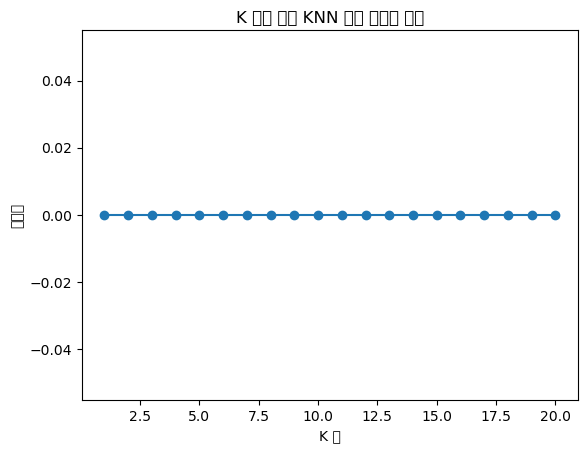

In [313]:
import numpy as np
import matplotlib.pyplot as plt

# 여러 개의 K 값을 테스트하여 최적의 K 찾기
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# 최적의 K 값 찾기
best_k = k_values[np.argmax(accuracies)]
print(f"최적의 K 값: {best_k}")

# 정확도 시각화
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K 값")
plt.ylabel("정확도")
plt.title("K 값에 따른 KNN 모델 정확도 변화")
plt.show()

In [ ]:
df

In [316]:
# 크기 데이터를 숫자로 변환하는 매핑 추가 (소형=1, 중형=2, 대형=3)
size_mapping = {"소형": 1, "중형": 2, "대형": 3}

# 크기를 숫자로 변환 (소-중형 → 평균값 적용)
df["크기_수치화"] = df["크기"].apply(lambda x: np.mean([size_mapping[s] for s in x]))



In [326]:
df.columns

Index(['품종', '원산지', '유형', '특징', '친화도 (1-10)', '수명 (년)', '크기', '손질 필요도',
       '운동 필요량 (시간/일)', '어린이 친화적 여부', '지능 (1-10)', '털 빠짐 정도', '건강 문제 위험',
       '평균 체중 (kg)', '훈련 난이도 (1-10)', '크기_수치화'],
      dtype='object')

In [328]:
X = df[['크기_수치화', '친화도 (1-10)', '지능 (1-10)']]

In [335]:
X

,크기_수치화,친화도 (1-10),지능 (1-10)
0,1.0,7,8
1,3.0,5,4
2,2.0,8,7
3,3.0,6,7
4,3.0,7,6
...,...,...,...
154,1.0,7,7
155,1.0,7,7
156,2.0,7,7
157,2.0,7,8


In [329]:
y = df['품종']

In [330]:
y

0                아펜핀셔
1             아프간 하운드
2            에어데일 테리어
3                 아키타
4           알래스칸 말라뮤트
            ...      
154        와이어 폭스 테리어
155       와이어헤어드 닥스훈트
156    와이어헤어드 포인팅 그리폰
157            솔로이츠퀸틀
158           요크셔 테리어
Name: 품종, Length: 159, dtype: object

In [331]:
label_encoder = LabelEncoder()

In [333]:
y = label_encoder.fit_transform(y)

In [347]:
y

array([ 84,  85,  87,  83,  86,  73,  74,  75,  90,  89,  91,  30,  31,
        47,  35,  32,  48,  45,  46,  33,  34,  36,  37,  39,  38,  43,
        44,  42,  40,  41, 126, 120, 121, 122, 123, 118, 119, 117, 116,
       115, 131, 128, 129, 124,  12,  13,  14,  15, 102, 105, 107, 103,
       104, 106,  88, 155, 152, 153, 151, 150, 114, 111, 112, 113, 108,
         1,   0,   3,   4,   2,   5, 157, 156,  81,  82,  76,  77,  80,
        79,  78, 101, 110, 109, 132, 125, 127, 130,  17,  21,  20,  16,
        24,  26,  27,  25,  29,  28,   6,  11,  10,   8,   9,   7,  93,
        92, 138, 140, 141,  49, 137, 145, 144, 147, 148, 149, 143, 142,
       146, 139, 154,  18,  19,  22,  23,  53,  51,  50,  62,  60,  61,
        54,  69,  71,  70,  72,  59,  68,  57,  55,  66,  67,  63,  65,
        64,  52,  58, 133, 136, 134, 135,  99, 100,  98, 158,  94,  95,
        96,  56,  97])

In [334]:
scaler = StandardScaler()

In [337]:
X = scaler.fit_transform(X)

In [351]:
X

array([[-1.26902514, -0.49907493,  0.98850664],
       [ 1.28508875, -2.56018958, -3.47028928],
       [ 0.0080318 ,  0.53148239, -0.12619234],
       [ 1.28508875, -1.52963225, -0.12619234],
       [ 1.28508875, -0.49907493, -1.24089132],
       [ 1.28508875,  0.53148239, -1.24089132],
       [-0.63049667,  1.56203972,  2.10320563],
       [ 0.0080318 ,  0.53148239, -1.24089132],
       [ 0.0080318 , -0.49907493,  2.10320563],
       [ 0.0080318 ,  0.53148239,  2.10320563],
       [-1.26902514, -0.49907493, -0.12619234],
       [-0.63049667, -1.52963225, -1.24089132],
       [ 0.0080318 ,  0.53148239, -2.3555903 ],
       [-0.63049667,  1.56203972, -0.12619234],
       [ 0.0080318 ,  0.53148239,  0.98850664],
       [ 1.28508875,  1.56203972, -0.12619234],
       [-1.26902514,  1.56203972,  0.98850664],
       [ 1.28508875, -0.49907493,  0.98850664],
       [ 1.28508875, -0.49907493, -1.24089132],
       [ 0.0080318 ,  0.53148239,  3.21790461],
       [-1.26902514,  0.53148239, -0.126

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [352]:
X_train

array([[ 1.28508875,  0.53148239, -0.12619234],
       [ 0.0080318 ,  0.53148239, -0.12619234],
       [ 0.0080318 ,  0.53148239, -0.12619234],
       [ 1.28508875, -1.52963225, -0.12619234],
       [ 0.0080318 ,  0.53148239, -0.12619234],
       [ 0.0080318 ,  1.56203972,  0.98850664],
       [ 1.28508875, -0.49907493, -1.24089132],
       [-1.26902514,  0.53148239, -0.12619234],
       [ 0.0080318 ,  0.53148239,  0.98850664],
       [-1.26902514, -0.49907493, -0.12619234],
       [ 0.0080318 , -1.52963225, -0.12619234],
       [-1.26902514, -1.52963225, -0.12619234],
       [ 1.28508875,  0.53148239, -0.12619234],
       [-1.26902514, -1.52963225, -0.12619234],
       [-1.26902514,  0.53148239,  0.98850664],
       [-1.26902514,  1.56203972,  0.98850664],
       [ 1.28508875, -1.52963225, -1.24089132],
       [-1.26902514, -0.49907493, -0.12619234],
       [-1.26902514,  0.53148239,  0.98850664],
       [-0.63049667, -1.52963225, -1.24089132],
       [ 0.0080318 , -0.49907493,  0.988

In [353]:
y_train

array([ 76,  55,  87, 130,  13, 129,   4, 139,  44,  57, 133,  16,   0,
       119, 109,  37, 127, 110, 147,  30, 137,   2,  62,  42,  99,  53,
       128,  86,  72, 121,  67, 138,   3,  91,  27,  69,  84, 146, 108,
        12, 125,  40, 131, 144,  43,  39, 143,  78, 115,  65,  92,  94,
        70,  15, 154, 111,  81, 122,  49, 134,  23, 112,  56,   6,   8,
       106,  73, 149,  22, 105, 118, 101,  80, 123,  14,  75, 124,   5,
        18, 145,  24, 132,  64,  52,  20,  90, 148,  47, 150,  68,  83,
        45, 116, 156,  66,  74,  71, 113,  88, 141, 107,  96, 151, 102,
        21,  36, 153, 158,  61, 117, 135,  85, 104,  54,  93,  10, 142,
        17,  82,  19,  97,  34, 157, 140,  35,  26,   7])

In [350]:
knn = KNeighborsClassifier(n_neighbors=2)

In [354]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [357]:
y_pred = knn.predict(X_test)

In [356]:
y_test

array([ 79,  95,  60, 155,  25,  41, 136, 103,  11,  63,  33, 114,  32,
         1,  38, 126,  50,   9,  28,  48, 100,  46,  31,  89, 120,  51,
        29, 152,  58,  98,  59,  77])

In [358]:
accuracy_score(y_test, y_pred)

0.0

In [359]:
new_dog = [[2, 8, 7]]  # 크기: 중형, 친화도: 8, 지능: 7
new_dog_scaled = scaler.transform(new_dog)
prediction = knn.predict(new_dog_scaled)
predicted_breed = label_encoder.inverse_transform(prediction)
print(f"예측된 품종: {predicted_breed[0]}")

예측된 품종: 노르웨지안 부훈트


c:\Users\USER\anaconda3\envs\hi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [361]:
df.loc[df['품종'] == '노르웨지안 부훈트']

,품종,원산지,유형,특징,친화도 (1-10),수명 (년),크기,손질 필요도,운동 필요량 (시간/일),어린이 친화적 여부,지능 (1-10),털 빠짐 정도,건강 문제 위험,평균 체중 (kg),훈련 난이도 (1-10),크기_수치화
100,노르웨지안 부훈트,Norway,허딩,스피츠형 외모,8,12,[중형],Moderate,2.0,Yes,7,Moderate,Low,12,6,2.0


In [166]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [168]:
ct =ColumnTransformer( ['encoder', OneHotEncoder(), [0]] , remainder='passthrough')

In [169]:
ct.fit_transform(df['크기'])

TypeError: 'OneHotEncoder' object is not iterable